In [1]:
import os

import pandas as pd
import numpy as np
from rdkit import Chem, DataStructs
from rdkit.Chem.AtomPairs import Pairs
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem, Descriptors, MACCSkeys

In [2]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = (400, 400)

In [3]:
path_data = os.path.join('data', 'tox21_smiles.csv')
df_tox21 = pd.read_csv(path_data)

In [4]:
sample1 = df_tox21['smiles'].iloc[0]
print(sample1)

CC(O)=O.[H][C@@]12CCC3=CC(=CC=C3[C@@]1(C)CCC[C@@]2(C)CN)C(C)C


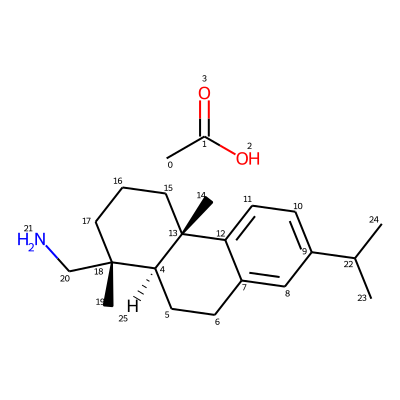

In [5]:
mol = Chem.MolFromSmiles(sample1)
mol 

In [6]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

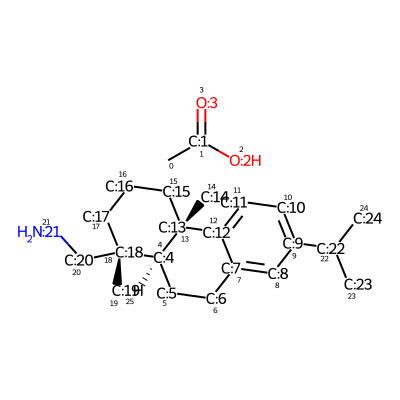

In [7]:
# With atom index
mol_with_atom_index(mol)

In [8]:
def rdkit_numpy_convert(fp, dtype=np.int8):
    '''Convert cDataStruct to Numpy array.'''
    output = []
    for f in fp:
        arr = np.zeros((1,), dtype=dtype)
        DataStructs.ConvertToNumpyArray(f, arr)
        output.append(arr)
    return np.asarray(output)

In [17]:
# Morgan Fingerprints
# fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
print(fingerprint)
X = rdkit_numpy_convert([fingerprint])
print(X.shape)
print(np.sum(X))

(1, 1024)
48


In [10]:
# Standard form of Atom-pair descriptor
fingerprint = Pairs.GetAtomPairFingerprint(mol)
print(fingerprint)
X = rdkit_numpy_convert([fingerprint])
print(X.shape)
print(np.sum(X))

(1, 8388608)
216


In [11]:
# Atom-pair descriptors encoded as a standard bit vector fingerprint
fingerprint = Pairs.GetAtomPairFingerprintAsBitVect(mol)
print(fingerprint)
fingerprint = DataStructs.cDataStructs.ConvertToExplicit(fingerprint)
X = rdkit_numpy_convert([fingerprint])
print(X.shape)
print(np.sum(X))

(1, 8388608)
111


In [12]:
# A SMARTS-based implementation of the 166 public MACCS keys
fingerprint = MACCSkeys.GenMACCSKeys(mol)
print(fingerprint)
X = rdkit_numpy_convert([fingerprint])
print(X.shape)
print(np.sum(X))

(1, 167)
38


In [13]:
# RDKit fingerprint 
fingerprint = Chem.RDKFingerprint(mol)
print(fingerprint)
X = rdkit_numpy_convert([fingerprint])
print(X.shape)
print(np.sum(X))

(1, 2048)
610
